# Customer Segmentation of Union Bank of Bolivia data

# By Shri Krishna

In this project we will extract data 'Union bank of Bolivia' customer data from Kaggle, then we will clean and transform values so that it becomes suitable to perform various visualization and segmentation operations. The task is performed using mix of R Studio and Jupyter Notebook.


# Importing libraries

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading data
df=pd.read_csv("Bank_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         1949 non-null   int64 
 1   Own_House         1949 non-null   int64 
 2   Own_vehicle       1949 non-null   int64 
 3   Monthly_Salary    1949 non-null   int64 
 4   Standard_Savings  1949 non-null   int64 
 5   Bank_Debts        1949 non-null   int64 
 6   Gender            1948 non-null   object
 7   Age               1949 non-null   int64 
 8   Name              1949 non-null   object
 9   Area              1949 non-null   object
dtypes: int64(7), object(3)
memory usage: 152.4+ KB


In [4]:

print(df.dtypes)

Person_ID            int64
Own_House            int64
Own_vehicle          int64
Monthly_Salary       int64
Standard_Savings     int64
Bank_Debts           int64
Gender              object
Age                  int64
Name                object
Area                object
dtype: object


In [5]:
df.columns

Index(['Person_ID', 'Own_House', 'Own_vehicle', 'Monthly_Salary',
       'Standard_Savings', 'Bank_Debts', 'Gender', 'Age', 'Name', 'Area'],
      dtype='object')

In [6]:
sns.set()
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [7]:
df.shape

(1949, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         1949 non-null   int64 
 1   Own_House         1949 non-null   int64 
 2   Own_vehicle       1949 non-null   int64 
 3   Monthly_Salary    1949 non-null   int64 
 4   Standard_Savings  1949 non-null   int64 
 5   Bank_Debts        1949 non-null   int64 
 6   Gender            1948 non-null   object
 7   Age               1949 non-null   int64 
 8   Name              1949 non-null   object
 9   Area              1949 non-null   object
dtypes: int64(7), object(3)
memory usage: 152.4+ KB


In [9]:
df.head

<bound method NDFrame.head of       Person_ID  Own_House  Own_vehicle  Monthly_Salary  Standard_Savings  \
0             1          0            1           66278              3989   
1             2          0            0           64701              7076   
2             3          1            1           28045              5659   
3             4          0            0           21690              6314   
4             5          0            0           67479              9894   
...         ...        ...          ...             ...               ...   
1944       1945          1            1           67926              2166   
1945       1946          0            0           80183              1586   
1946       1947          1            1           96467              8345   
1947       1948          0            1           67360              4461   
1948       1949          0            0           88695              7387   

      Bank_Debts Gender  Age        Name     

# check for missing values

<AxesSubplot:>

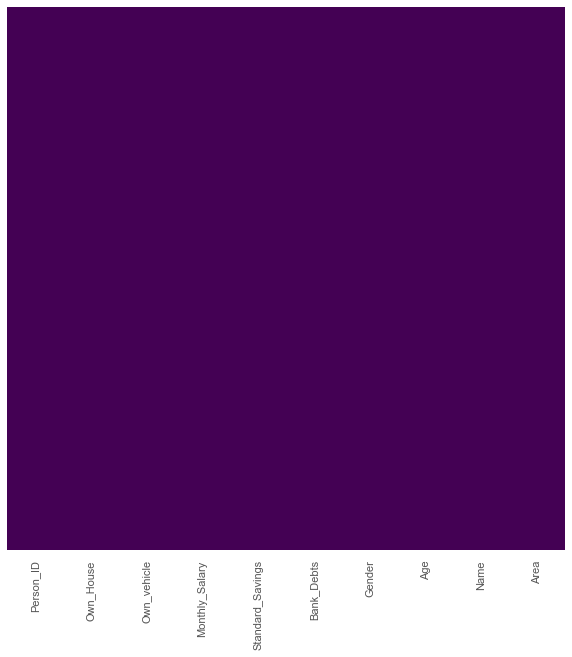

In [10]:

plt.figure(figsize=(10,10))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Gender.head()

,M
0,0
1,1
2,0
3,0
4,0


In [12]:
Area = pd.get_dummies(df['Area'])
Area.head()

,5 de Mayo,Aban,Agbannawag,Aghsu,Agnibilékrou,Agoncillo,Agua Fría,Aguas Verdes,Agía Triáda,Aioi,...,Żabbar,Žacléř,Žďár,Крива Паланка,Нераште,Ростуша,Ḩawallī,Ḩuraytān,‘Alīābād-e Katūl,‘Izrā
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

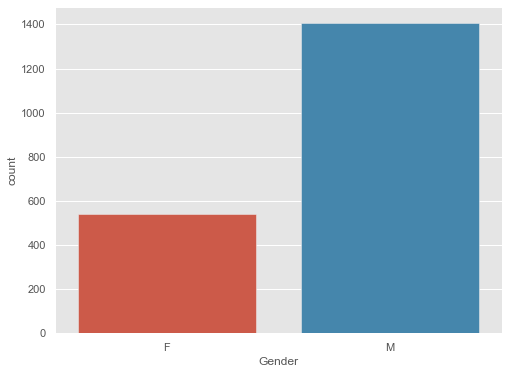

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

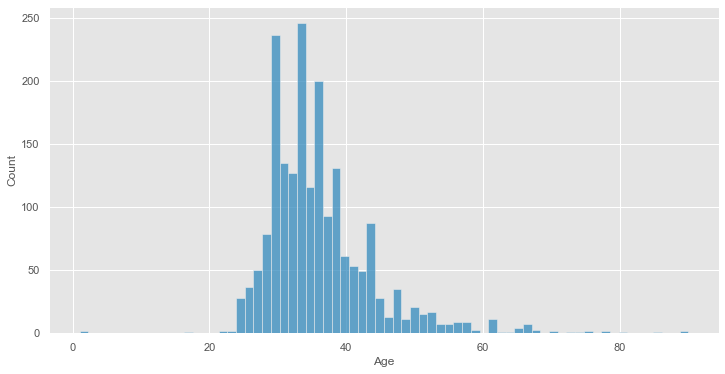

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age', data=df)

<AxesSubplot:xlabel='Standard_Savings', ylabel='Count'>

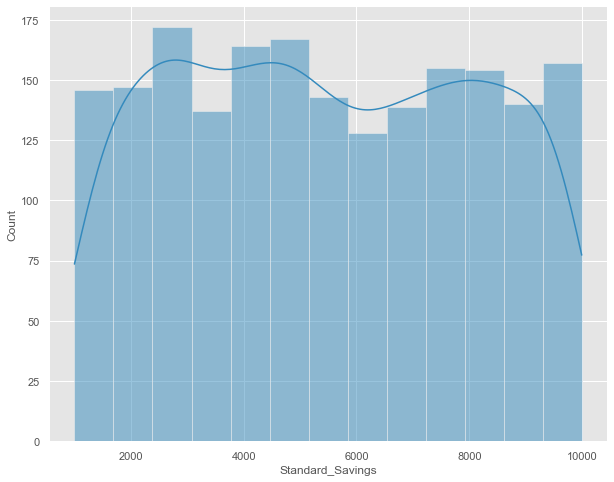

In [15]:
plt.figure(figsize=(10,8))
sns.histplot(x='Standard_Savings', data=df,kde=True)

<AxesSubplot:xlabel='Monthly_Salary', ylabel='Count'>

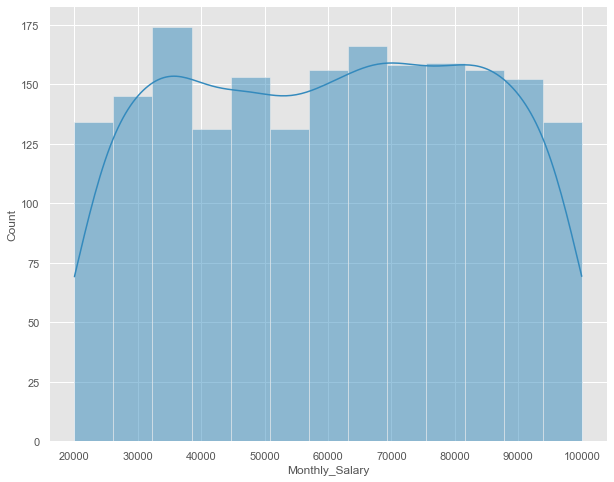

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(x='Monthly_Salary', data=df,kde=True)

# Feature Selection

In [17]:
#Feature Selection 
newdata=df.iloc[:,3:8]
newdata

,Monthly_Salary,Standard_Savings,Bank_Debts,Gender,Age
0,66278,3989,1,F,28
1,64701,7076,1,M,65
2,28045,5659,1,F,25
3,21690,6314,0,F,48
4,67479,9894,0,F,34
...,...,...,...,...,...
1944,67926,2166,1,M,32
1945,80183,1586,0,F,27
1946,96467,8345,0,M,32
1947,67360,4461,0,M,45


In [18]:
newdata=newdata.drop(['Gender'],axis=1)
newdata

,Monthly_Salary,Standard_Savings,Bank_Debts,Age
0,66278,3989,1,28
1,64701,7076,1,65
2,28045,5659,1,25
3,21690,6314,0,48
4,67479,9894,0,34
...,...,...,...,...
1944,67926,2166,1,32
1945,80183,1586,0,27
1946,96467,8345,0,32
1947,67360,4461,0,45


# Importing model

In [19]:
#Importing Models
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters=6)

In [21]:
kmeans.fit(newdata)

KMeans(n_clusters=6)

In [22]:
kmeans.cluster_centers_

array([[3.99230060e+04, 5.62913731e+03, 5.70149254e-01, 3.60477612e+01],
       [6.75229971e+04, 5.38499412e+03, 4.73529412e-01, 3.58470588e+01],
       [8.05597651e+04, 5.54313554e+03, 5.03012048e-01, 3.61746988e+01],
       [5.38486798e+04, 5.51118429e+03, 5.34743202e-01, 3.54803625e+01],
       [2.68434058e+04, 5.23396753e+03, 4.54545455e-01, 3.63214286e+01],
       [9.32875248e+04, 5.49476238e+03, 4.81848185e-01, 3.68943894e+01]])

In [23]:
print(kmeans.labels_) 
print(len(kmeans.labels_))

[1 1 4 ... 5 1 5]
1949


In [24]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 335, 1: 338, 2: 334, 3: 331, 4: 308, 5: 303}


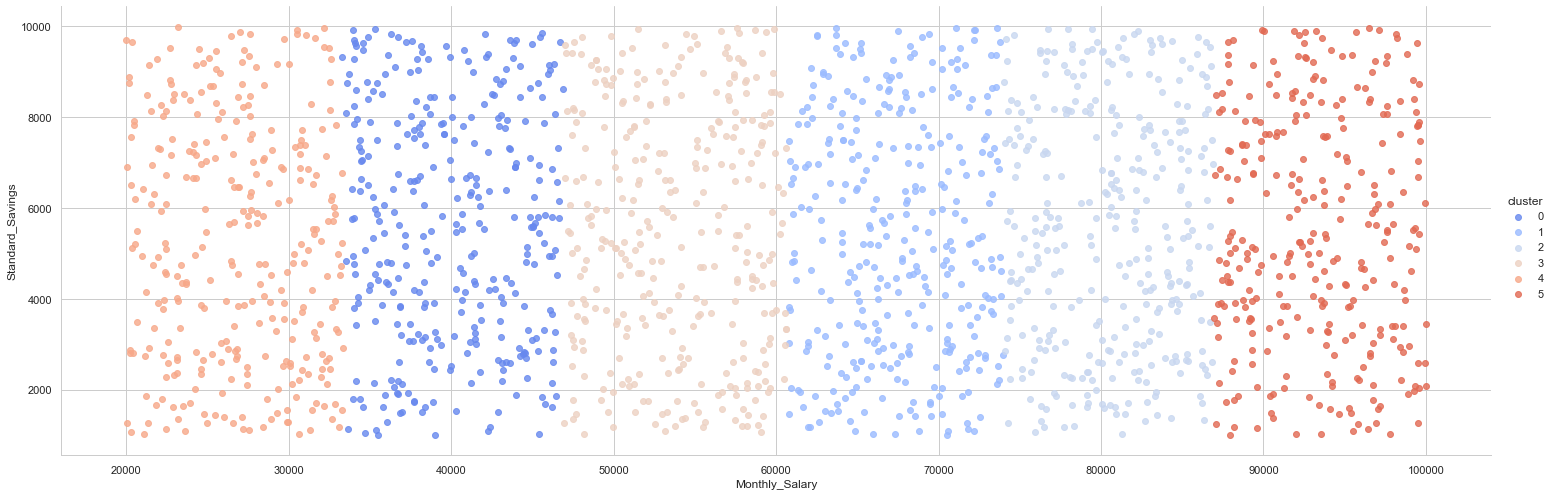

In [25]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Monthly salary and standard Savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Monthly_Salary','Standard_Savings',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=3,fit_reg=False)

# Clusters with respect to monthly salary and standard savings

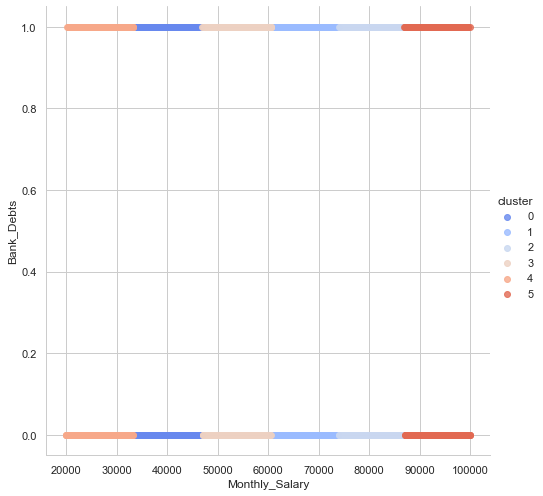

In [26]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Monthly Salary and Bank debts 
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Monthly_Salary','Bank_Debts',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

# Clusters with respect to monthly salary and bank debts

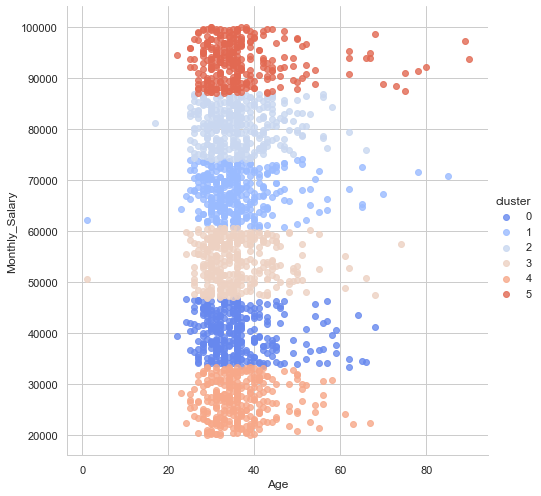

In [27]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data between Age and Monthly Salary
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Monthly_Salary',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

# Clusters with respect to Age and Monthly salary 

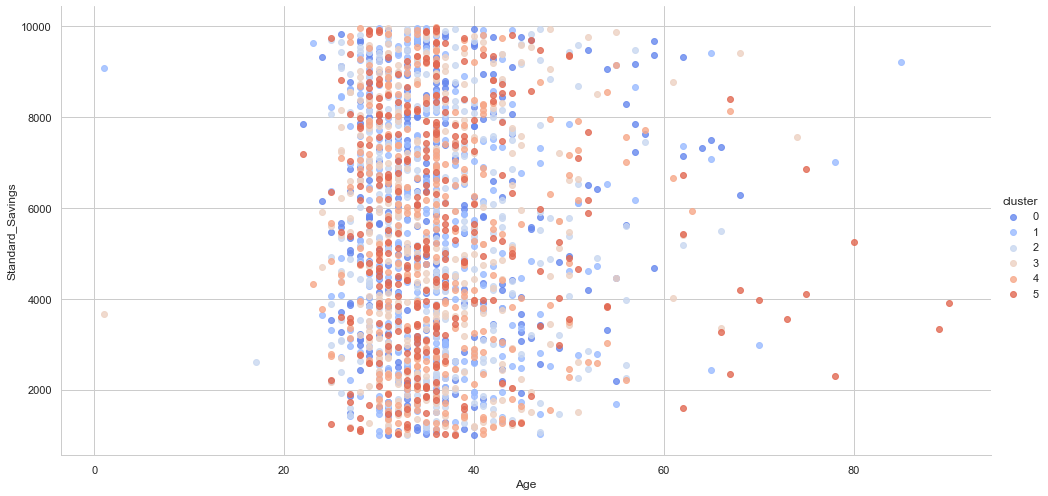

In [28]:
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
#plot the data Age and standard savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Standard_Savings',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=2,fit_reg=False)

# Clusters with respect to Age and standard savings